# Autproductie

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import seaborn as sns

file_path = '../data/input/cars.csv'
cars = pd.read_csv(file_path)

### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

In [2]:
cars.year.dtype

dtype('int64')

In [3]:
cars.year.value_counts().sort_index(ascending=False)

year
2024         2
2023     18218
2022     80714
2021    108894
2020    133589
         ...  
1925         2
1923         4
1919         1
1917         1
1915         2
Name: count, Length: 100, dtype: int64

### Antwoord:
De waardes in het veld `year`:
* zijn door pd.read_csv opgeslagen in een veld van het data type int64 en zijn dus integers
* gaan van 1915 tot 2024. Hoogstwaarschijnlijk gaat het om het productiejaar van de auto

In [4]:
cars.fuel_type.dtype

dtype('O')

In [5]:
cars.fuel_type.value_counts().sort_values(ascending=False)

fuel_type
Gasoline                         644644
Hybrid                            29141
Diesel                            27967
E85 Flex Fuel                     18772
Electric                          16192
B                                  1442
Flexible Fuel                       493
Plug-In Hybrid                      118
Gasoline Fuel                        80
Gasoline/Mild Electric Hybrid        70
Regular Unleaded                     56
Premium Unleaded                     49
G                                    45
Compressed Natural Gas               29
Unspecified                          26
Diesel Fuel                           5
Hybrid Fuel                           5
Hydrogen Fuel Cell                    3
Gaseous                               3
Other                                 3
Flex Fuel Capability                  2
Electric Fuel System                  2
Gas                                   2
PHEV                                  2
Gas/Electric Hybrid           

### Antwoord:
De waardes in het veld `fuel_type`:
* zijn door pd.read_csv automatisch opgeslagen in een veld van het type object en zijn dus vermoedelijk hoofdzakelijk strings
* uitgaande van de waardes en de omschrijving van het veld en na visuele inspectie is duidelijk dat het gaat om de brandstof van de wagens

In [6]:
cars.seller_rating.dtype

dtype('float64')

In [7]:
cars.seller_rating.value_counts().sort_index(ascending=False)

seller_rating
5.0    16939
4.9    51092
4.8    64396
4.7    56343
4.6    49169
4.5    40523
4.4    30633
4.3    26375
4.2    21922
4.1    18092
4.0    16469
3.9    16280
3.8    12180
3.7    10962
3.6    11438
3.5     9476
3.4     9589
3.3    10235
3.2     6471
3.1     7641
3.0     6274
2.9     4959
2.8     6047
2.7     4761
2.6     5132
2.5     4260
2.4     4324
2.3     2944
2.2     3769
2.1     2919
2.0     1613
1.9     2934
1.8     3900
1.7     1912
1.6     1477
1.5     1360
1.4      858
1.3      879
1.2      810
1.1      184
1.0      577
Name: count, dtype: int64

### Antwoord:
De waardes in het veld `seller_rating`:
* zijn door pd.read_csv automatisch opgeslagen in een veld van het type float64 en zijn dus decimale getallen
* de waardes gaan van 1.0 tot 5.0. De inhoud bevat een score voor de verkoper op het verkoopplatform.

### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

In [8]:
# Determining the median price of a Volvo
cars[cars['manufacturer'] == 'Volvo']['price'].median()

36673.0

In [9]:
# Identifying the record with the median price
volvos = cars[cars['manufacturer'] == 'Volvo'].sort_values(by='price')
volvos.iloc[len(volvos) // 2]

manufacturer                               Volvo
model                              XC40 R-Design
year                                        2020
mileage                                  35989.0
engine                                   I-4 cyl
transmission           Automatic with Geartronic
drivetrain                                   AWD
fuel_type                               Gasoline
mpg                                          NaN
exterior_color               Onyx Black Metallic
interior_color                          Charcoal
accidents_or_damage                          0.0
one_owner                                    1.0
personal_use_only                            1.0
seller_name                    Borton Volvo Cars
seller_rating                                4.0
driver_rating                                4.9
driver_reviews_num                          50.0
price_drop                                   NaN
price                                    36673.0
Name: 755471, dtype:

### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
![alt text](image.png)
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

<Axes: ylabel='Frequency'>

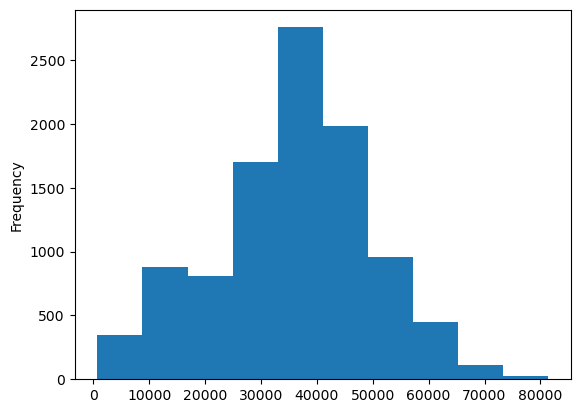

In [10]:
# Plotting a histogram chart
volvos['price'].plot(kind="hist")

### Antwoord
Op basis van bovenstaand histogram zou ik verwachten dat zowel het gemiddelde als de mediaan net boven 35.000 zouden liggen

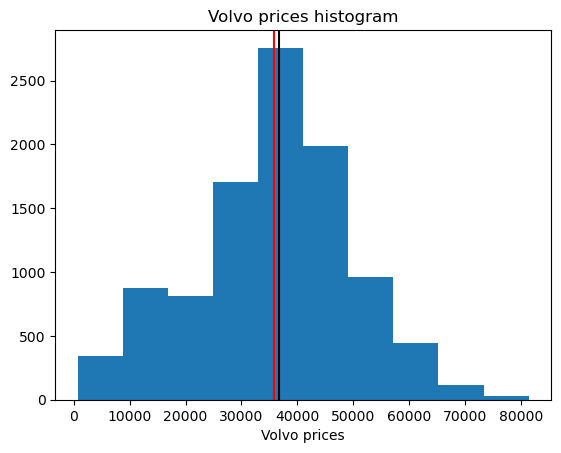

In [11]:
# Plotting a histogram chart
plt.hist(volvos['price'], bins=10)

# Plotting the mean and the median on the histogram chart
plt.axvline(x=volvos['price'].mean(), color='red')
plt.axvline(x=volvos['price'].median(), color='k')

# Adding labels, title and visualizing the plot
plt.xlabel('Volvo prices')
plt.title(f'Volvo prices histogram')
plt.show()

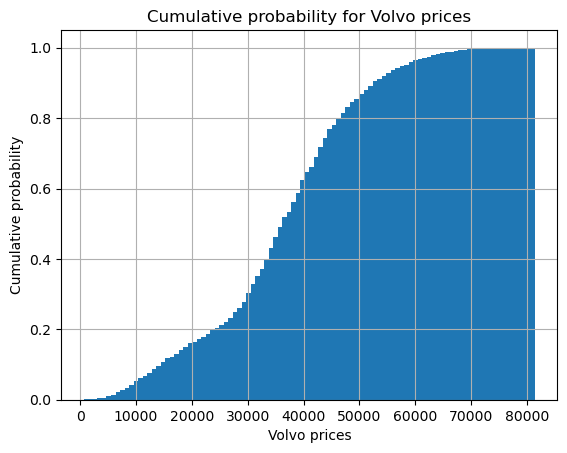

In [12]:
# Emperical Cumulative Distribution Function - calculated using a histogram + cumulative + density parameter

# Plotting the histogram of the volvo prices
plt.hist(volvos['price'], bins = 100, cumulative=True, density=True)

# Adding labels, title and visualizing the plot
plt.xlabel('Volvo prices')
plt.ylabel('Cumulative probability')
plt.title(f'Cumulative probability for Volvo prices')
plt.grid(True)
plt.show()


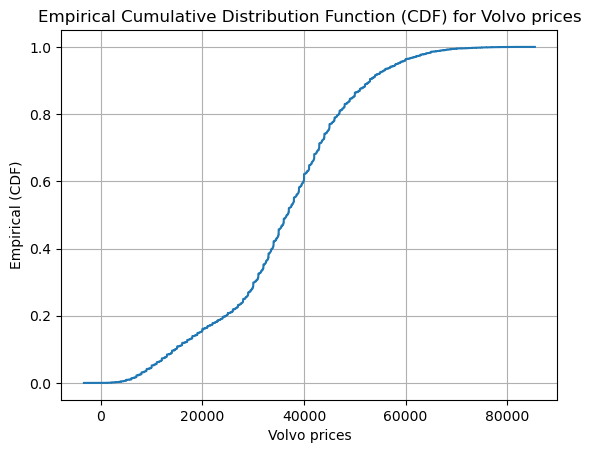

In [13]:
# Emperical Cumulative Distribution Function - calculated using SciPy's ecdf function

# Calculating and plotting the ecdf of Volvo prices
volvo_prices_ecdf = sp.stats.ecdf(volvos['price'])
ax = plt.subplot()
volvo_prices_ecdf.cdf.plot(ax)

# Adding labels, title and visualizing the plot
plt.title(f'Empirical Cumulative Distribution Function (CDF) for Volvo prices')
plt.ylabel('Empirical (CDF)')
plt.xlabel('Volvo prices')
plt.grid(True)
plt.show()

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?
![alt text](image-1.png)

### Antwoord: 
Het oorspronkelijke histogram dat in de opdracht werd getoond is verbeterd door de gevisualiseerde data te normaliseren (door de density-parameter toe te voegen).

Gezien het grote verschil in het aantal records per brandstoftype, maakt dit een betere vergelijking van de prijzen mogelijk.

Onder het aangepaste histogram worden alternatieve opties voor het vergelijken van prijzen tussen Volvo's van verschillende brandstoftypes weergegeven in (1) een boxplot, (2) een violinplot en (3) een plot van de cumulatieve verdelings functies.


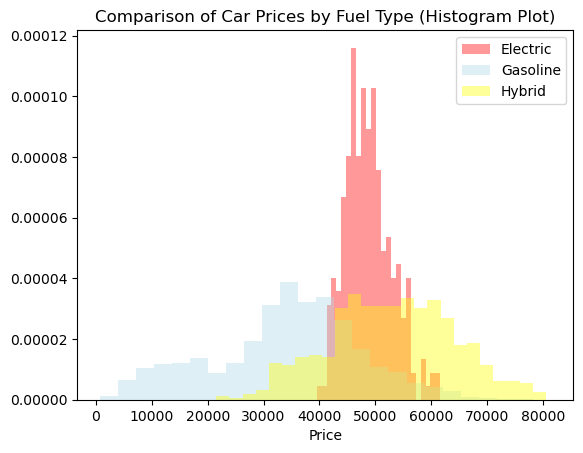

In [14]:
# Dataframe filtering obv het fuel_type
volvos_electric = volvos[volvos['fuel_type'] == 'Electric']
volvos_gasoline = volvos[volvos['fuel_type'] == 'Gasoline']
volvos_hybrid = volvos[volvos['fuel_type'] == 'Hybrid']

# Plotting the histograms for each fuel type => Adding the density=True parameter to make a better comparison
plt.hist(volvos_electric['price'], bins=25, color='red', alpha=0.4, density=True, label='Electric')
plt.hist(volvos_gasoline['price'], bins=25, color='lightblue', alpha=0.4, density=True, label='Gasoline')
plt.hist(volvos_hybrid['price'], bins=25, color='yellow', alpha=0.4, density=True, label='Hybrid')
plt.xlabel('Price')
plt.title('Comparison of Car Prices by Fuel Type (Histogram Plot)')
plt.legend()
plt.show()

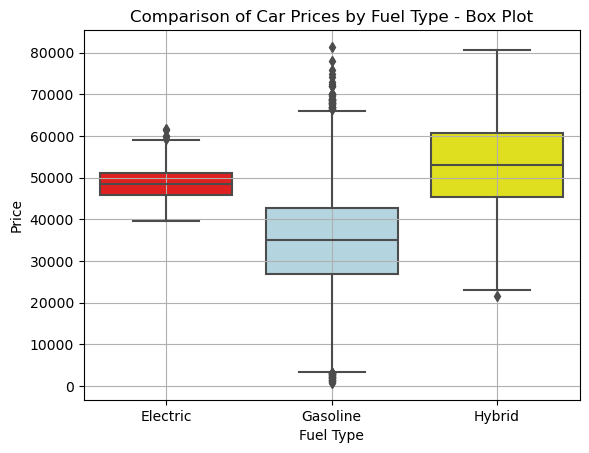

In [15]:
# Combine data into a single DataFrame
volvos_combined = pd.concat([volvos_electric.assign(Fuel_Type='Electric'),
                             volvos_gasoline.assign(Fuel_Type='Gasoline'),
                             volvos_hybrid.assign(Fuel_Type='Hybrid')])

# Creating dictionary to store colors per fuel type
my_colors = {'Electric': 'red', 'Gasoline': 'lightblue', 'Hybrid': 'yellow'}

# Creating a box plot
sns.boxplot(data=volvos_combined, x='Fuel_Type', y='price', palette=my_colors.values())
# Adding labels, title and visualizing the plot
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Comparison of Car Prices by Fuel Type - Box Plot')
plt.grid(True) 
plt.show()


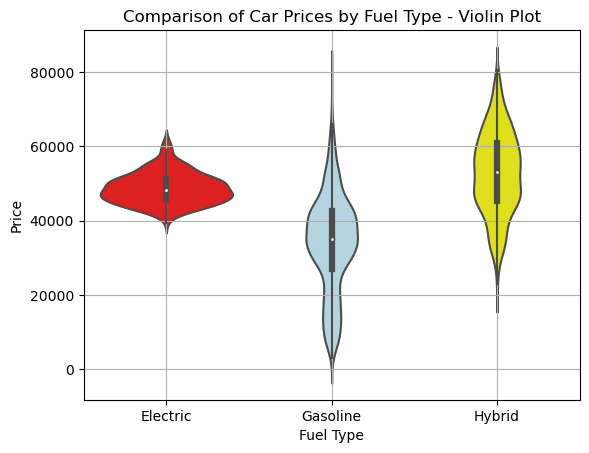

In [16]:
# Creating a violin plot
sns.violinplot(data=volvos_combined, x='Fuel_Type', y='price', palette=my_colors.values())

# Adding labels, title and visualizing the plot
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Comparison of Car Prices by Fuel Type - Violin Plot')
plt.grid(True)
plt.show()

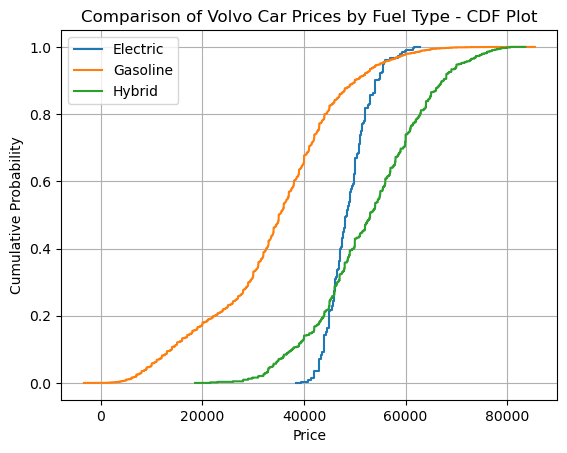

In [17]:
from statsmodels.distributions.empirical_distribution import ECDF

# Taking the prices for each fuel type
volvos_electric_prices = volvos_electric['price']
volvos_gasoline_prices = volvos_gasoline['price']
volvos_hybrid_prices = volvos_hybrid['price']

# Calculating empirical cumulative distribution functions
volvos_electric_prices_ecdf = sp.stats.ecdf(volvos_electric_prices)
volvos_gasoline_prices_ecdf = sp.stats.ecdf(volvos_gasoline_prices)
volvos_hybrid_prices_ecdf = sp.stats.ecdf(volvos_hybrid_prices)

# Plotting CDFs
ax = plt.subplot()
volvos_electric_prices_ecdf.cdf.plot(ax, label='Electric')
volvos_gasoline_prices_ecdf.cdf.plot(ax, label='Gasoline')
volvos_hybrid_prices_ecdf.cdf.plot(ax, label='Hybrid')

# Adding labels, title and visualizing the plot
plt.xlabel('Price')
plt.ylabel('Cumulative Probability')
plt.title('Comparison of Volvo Car Prices by Fuel Type - CDF Plot')
plt.legend()
plt.grid(True)
plt.show()


### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

![Image Title](statistiek_deel2_autoproductie_vraag5_boxplots.jpeg)

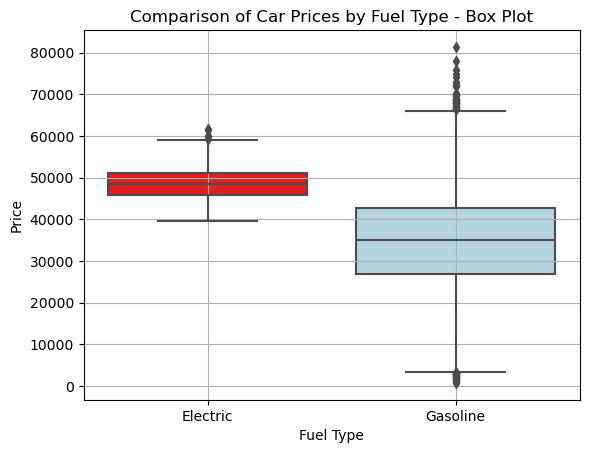

In [18]:
## Recreating the boxplot since it is not clear to me where the original picture comes from / the original picture is not visualized

# cars_electric = cars[cars['fuel_type'] == 'Electric']
# cars_gasoline = cars[cars['fuel_type'] == 'Gasoline']
# cars_hybrid = cars[cars['fuel_type'] == 'Hybrid']

# Combine data into a single DataFrame
volvos_combined = pd.concat([volvos_electric.assign(Fuel_Type='Electric'),
                             volvos_gasoline.assign(Fuel_Type='Gasoline')])

# Creating dictionary to store colors per fuel type
my_colors = {'Electric': 'red', 'Gasoline': 'lightblue'}

# Creating a box plot
sns.boxplot(data=volvos_combined, x='Fuel_Type', y='price', palette=my_colors.values())
# Adding labels, title and visualizing the plot
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Comparison of Car Prices by Fuel Type - Box Plot')
plt.grid(True) 
plt.show()

### Vragen + antwoorden
 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.
    
    #### Antwoord: Onwaar

    Op basis van de box plots valt door visuele inspectie duidelijk af te leiden dat de spreiding van benzinewagens veel groter is dan die van electrische wagens.

    Kwartielafstand
    De spreiding van de prijzen van bezinewagens (excl outliers) varieert van ongeveerd 27k (Q1) tot 43k (Q3) wat een verschil (IQR - interquartile range) betekent van 16k.
    Beschouwen we de box plot voor prijzen van electrische wagens, dan zien we dat die zeer geconcentreerd zitten net onder 50k, met onderste kwartiel Q1 rond de 46k en een bovenste kwartiel Q3 van 51k. Wat een IQR geeft van ongeveer 5k.
    
    Spreidingsbreedte
    We kunnen duidelijk zien dat de hele box plot van electrische wagens incl de whiskers, helemaal past in alleen al de bovenste whisker van de plot van benzinewagens.
    De spreidingsbreedte van benzinewagens (excl outliers) varieert van ongeveer 3k (min) tot ongeveer 66k (max), wat een verschil geeft van wel 63k.
    Terwijl de spriedingsbreedte van electrische wagens varieert van 40k (min) tot net geen 60k max, een afstand van slechts 20k.

    Het is dus duidelijk dat de spreding van de prijs van bezine wagens veel groter is dan die van electrische wagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.
    
    #### Antwoord: Het antwoord op deze vraag valt niet te besluiten uit de box plots. 

    Een box plot zegt iets over de spreiding van de data punten, maar het geeft geen informatie over op hoeveelheid data punten waarop een specifiek box plot gebaseerd is.
    Wanneer je 2 verschillende "types" data-punten (electrisch versus benzine) naast elkaar visualiseert in 2 box plots, dan kan je dus wel de spreiding van de verschillende "types" vergelijken, 
    maar je kan geen conslusies trekken mbt de kans dat een datapunt in het ene plot vs het andere plot valt.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.
    
    #### Antwoord: Waar
    
    Binnen eenzelfde box plot kan je wel conclusies trekken mbt de kans van een data-punt.

   /// REFINE THIS ANSWER ///

    Elecrische auto's - We kunnen zien dat 50k voor de electrische wagens ongeveer halverwege tussen het 2de kwartiel (de mediaan (Q2) of de 50% marker) en het 3de kwartiel (Q3 of de 75% marker) ligt. Hieruit kunnen we afleiden dat sowieso meer dan 25% van de elektrische wagens meer dan 50k kosten

    Benzine auto's - De 50k marker ligt duidelijk in de bovenste whisker (datapunten boven het +75% marker) van het box plot voor benzinewagens. 
    Minstens 75% van de data punten voor benzinewagens of - anders gezegd - maximum 25% van onze datapunten liggen boven het 3de kwartiel. Het 3de kwartiel (Q3) is ongeveer gelijk aan 43k.
    Maximum 25% van de benzine auto's kost meer dan 43k, en dus kunnen we zeker zeggen dat maximum 25% van de benzine auto's meer dan 50k kost.

    Een elektrische wagen heeft dus meer kans om meer dan 50k te kosten (minstens 25% maar waarschijnlijk dichter tegen 50% kans) dan een benzine wagen (maximum 25% kans).

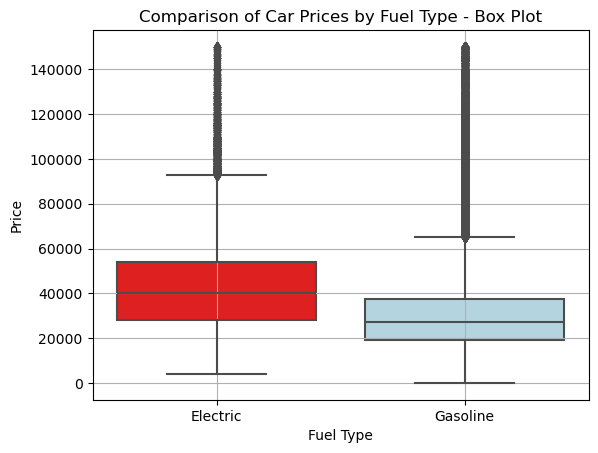

In [27]:
cars_electric = cars[(cars['fuel_type'] == 'Electric') & (cars['price'] <= 150000)]
cars_gasoline = cars[(cars['fuel_type'] == 'Gasoline') & (cars['price'] <= 150000)]
cars_hybrid = cars[(cars['fuel_type'] == 'Hybrid') & (cars['price'] <= 150000)]

# Combine data into a single DataFrame
cars_combined = pd.concat([cars_electric.assign(Fuel_Type='Electric'),
                             cars_gasoline.assign(Fuel_Type='Gasoline')])

# Creating dictionary to store colors per fuel type
my_colors = {'Electric': 'red', 'Gasoline': 'lightblue'}

# Creating a box plot
sns.boxplot(data=cars_combined, x='Fuel_Type', y='price', palette=my_colors.values())
# Adding labels, title and visualizing the plot
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Comparison of Car Prices by Fuel Type - Box Plot')
plt.grid(True) 
plt.show()


In [20]:
# Calculating percentage of electric cars with price above 50k
car_prices = cars[cars['fuel_type'] == 'Electric'].price  # Your list of car prices

# Convert the list to a NumPy array for easier manipulation
prices_array = np.array(car_prices)

# Calculate the percentage of prices above 50k
percentage_above_50k = np.sum(prices_array > 50000) / len(prices_array) * 100

print("Percentage of prices above 50k:", percentage_above_50k)


Percentage of prices above 50k: 30.50889328063241


In [21]:
# Calculating percentage of gasoline cars with price above 50k
car_prices = cars[cars['fuel_type'] == 'Gasoline'].price  # Your list of car prices

# Convert the list to a NumPy array for easier manipulation
prices_array = np.array(car_prices)

# Calculate the percentage of prices above 50k
percentage_above_50k = np.sum(prices_array > 50000) / len(prices_array) * 100

print("Percentage of prices above 50k:", percentage_above_50k)

Percentage of prices above 50k: 10.157854567792455


### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

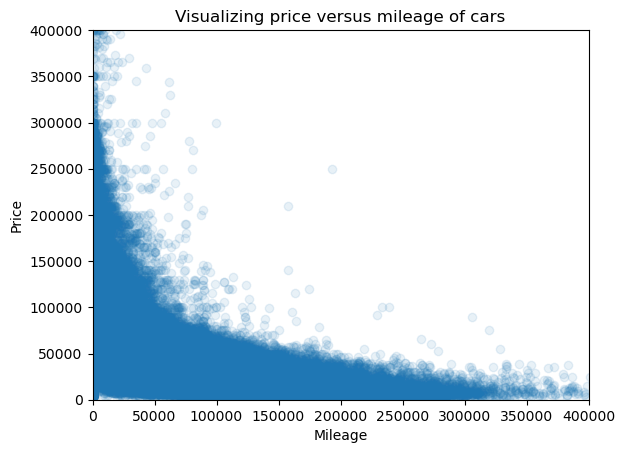

In [22]:
# Min & max values for the miles of the cars
mileage_min = 0
mileage_max = 400000

# Min & max values for the price of the cars
price_min = 0
price_max = 400000

# Creating a scatterplot to visualize the relation between price & mileage
plt.scatter(x=cars['mileage'], y=cars['price'], alpha=0.1)
plt.xlim(mileage_min, mileage_max)
plt.ylim(price_min, price_max)
plt.title('Visualizing price versus mileage of cars')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

### Optioneel - modeleren lineare regressie

Mean Squared Error: 264802747.23182806
R-squared: 0.20694764897563267


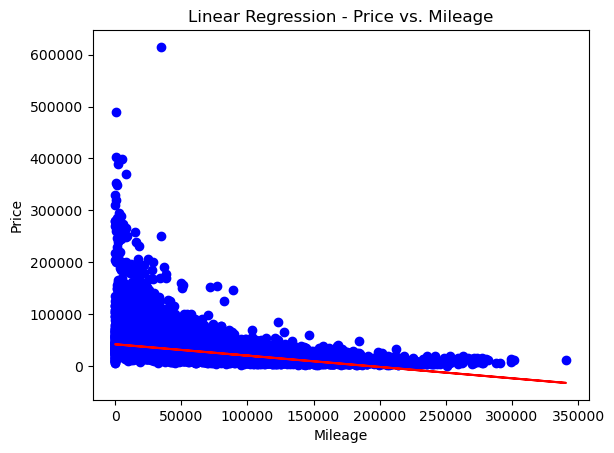

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have a DataFrame named 'cars' with columns 'mileage' and 'price'

new_cars = cars.dropna()

# Step 2: Prepare Data
X = new_cars['mileage'].values.reshape(-1, 1)  # Features (mileage)
y = new_cars['price'].values  # Target variable (price)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optionally, you can visualize the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Linear Regression - Price vs. Mileage')
plt.show()


### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?

In [31]:
# Calculating mean price of electric volvo
cars[(cars['manufacturer'] == 'Volvo') & (cars['fuel_type'] == 'Electric')].price.mean()

48788.391304347824

### Antwoord:

Om de betrouwbaarheid van de schatting te evaluren kunnen we de bootstrapping methode gebruiken door herhaaldelijk steekproeven te trekken uit de dataset, waarbij elke keer opnieuw het gemiddelde van de prijs van tweedehands electrische volvo's wordt berekend.

In [38]:
# Bootstrapping
# Voorbeeld dataset (lijst met prijzen van tweedehands Volvo's)
car_prices = list(volvos_electric.price)

# Definieer het aantal bootstrapsteekproeven
num_bootstraps = 1000

# Maak een lege lijst om de geschatte gemiddelde prijzen op te slaan
bootstrapped_means = []

# Voer bootstrapping uit
for _ in range(num_bootstraps):
    # Trek een steekproef met vervanging uit de originele dataset
    bootstrap_sample = np.random.choice(car_prices, size=len(car_prices), replace=True)
    # Bereken de gemiddelde prijs van de bootstrapsample
    bootstrap_mean = np.mean(bootstrap_sample)
    # Voeg de geschatte gemiddelde prijs toe aan de lijst
    bootstrapped_means.append(bootstrap_mean)

# Bereken het betrouwbaarheidsinterval voor het gemiddelde van de prijzen
confidence_interval = np.percentile(bootstrapped_means, [2.5, 97.5])

# Print het betrouwbaarheidsinterval
print("Betrouwbaarheidsinterval voor het gemiddelde van de prijzen:", confidence_interval)


Betrouwbaarheidsinterval voor het gemiddelde van de prijzen: [48267.23833992 49321.98418972]
